# Conditional Gradient Method 

**Author:** Tran Thu Le

**Date:** 03/12/2023 

**Summary:** This notebook aims to provide a minimal Python implementation for [Conditional gradient method](https://en.wikipedia.org/wiki/Frank%E2%80%93Wolfe_algorithm) with application on Closest point projection problem.

## Conditional gradient method

Here we consider the linear-constraints optimization problem:

$$\min_{x} f(x)  \hspace{0.5cm} \text{s.t.} \hspace{0.5cm} Ax\leq b$$

To solve such a problem, at each location $x^{(k)}$, we replace the objective function by its local linearization:
$$f(x)\approx f(x^{(k)}) + \langle \nabla f(x^{(k)}), x-x^{(k)}\rangle$$

and find a "directional point" $s^{(k)}$ by solving the corresponding linear programming problem

$$s^{(k)} ≜ \arg\min_{x} \langle \nabla f(x^{(k)}), x\rangle \hspace{0.5cm} \text{s.t.} \hspace{0.5cm} Ax\leq b$$

We then update our location by moving toward directional point as follows
$$x^{(k+1)} = x^{(k)} + \alpha^{(k)} (s^{(k)}-x^{(k)})$$
where $\alpha^{(k)}=\frac{2}{k+2}$ for $k\geq 1$.

## Projection problem

We now, apply the conditional gradient to closest point projection problem:

$$\min_{x} \frac{1}{2}||x-c||^2  \hspace{0.5cm} \text{s.t.} \hspace{0.5cm} Ax\leq b$$

Here $f(x)=\frac{1}{2}||x-c||^2$ and, thus, $\nabla f(x)=x-c$.

The following is a minimal Python code for solving Projection problem using the Conditional gradient method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog


def conditional_gradient(A, b, c, x_init):
    """
        Input:
            A: array of shape (m, n)
            b: array of shape (m, )
            c: array of shape (n, )
            x_init: array of shape (n, )

        Problem:
            min     0.5 * ||x-c||^2 
            s.t.    Ax<b

        Solver: Conditional gradient method

        Return:
            x: array of shape (n, ) the optimal solution
            x_list: list of iterative solutions
            s_list: list of directional points
    """
    x = x_init
    x_list = []
    s_list = []
    for i in range(1, 100):
        grad = x-c
        s = linprog(grad, A_ub=A, b_ub=b).x
        alpha = 2/(i+2) # condition i>=1 
        x = x + alpha*(s-x)
        x_list += [x]
        s_list += [s]
    return x, x_list, s_list


We now consider a particular projection problem on plane.
Here the point $c=(0.5, 2)$ and the constraints are
$$\begin{aligned}
    x_1+x_2&\leq 2\\
    x_1&\leq 1\\
    x_1& \geq 0\\
    x_2&\geq 0
\end{aligned}$$

So, the matrix $A$ is 
$$\begin{aligned}
A &=[[1, 1], [1, 0], [-1, 0], [0, -1]]\\
b &= [2, 1, 0, 0]
\end{aligned}$$

We may choose any initial point satisfying the constraints, e.g. $x_{init} = (0.5, 0)$

In [2]:
c = np.array([0.5, 2])
A = np.array([[1, 1], [1, 0], [-1, 0], [0, -1]])
b = np.array([2, 1, 0, 0])
x_init = np.array([0.5, 0])

In [3]:
# we now solve the problem
x_opt, x_list, s_list = conditional_gradient(A, b, c, x_init)
print("optimal solution is", x_opt)
fx_opt = 0.5 * np.linalg.norm(x_opt)**2
print("optimal value is", fx_opt)

optimal solution is [0.24861386 1.75108911]
optimal value is 1.5640609597098327


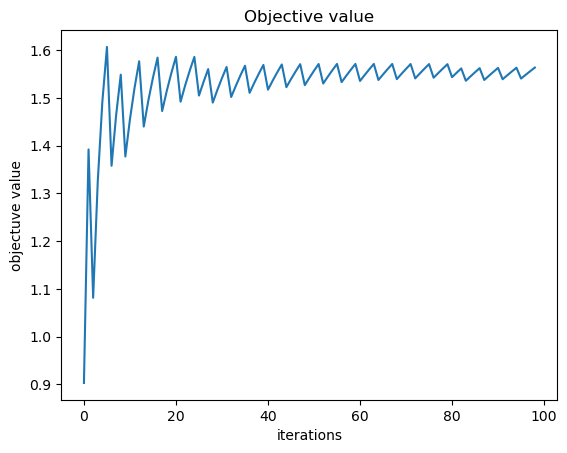

In [4]:
# plot objective values
fx_list = [0.5*np.linalg.norm(x)**2 for x in x_list]
plt.plot(fx_list)
plt.title("Objective value")
plt.xlabel("iterations")
plt.ylabel("objectuve value")
plt.show()

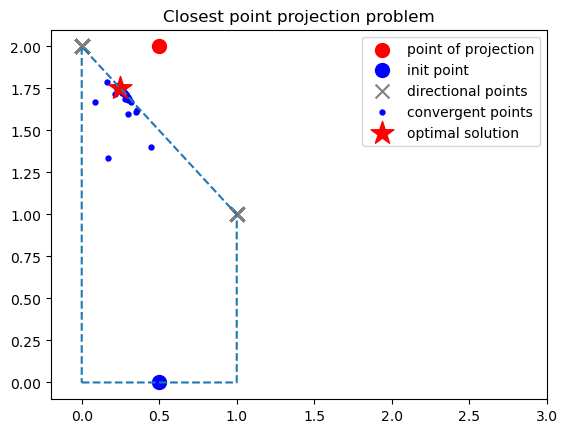

In [5]:
# visualization of iterations
nodes = [(0, 0), (1, 0), (1, 1), (0, 2), (0, 0)]
nodes = np.array(nodes).T 
solutions = np.array(x_list).T
dir_points = np.array(s_list).T

plt.plot(nodes[0], nodes[1], ls="--")
plt.scatter(c[0], c[1], c="red", s=100, label="point of projection")
plt.scatter(x_init[0], x_init[1], c="blue", s=100, label="init point")
plt.scatter(dir_points[0], dir_points[1], c="gray", s=100, marker="x", label="directional points")
plt.scatter(solutions[0], solutions[1], c="blue", s=50, marker=".", label="convergent points")
plt.scatter(x_opt[0], x_opt[1], c="red", s=300, marker="*", label="optimal solution")
plt.xlim(-0.2, 3.0)
plt.title("Closest point projection problem")
plt.legend()
plt.show()